<h1 style="text-align: center; font-weight: bold;">
    Χρήστος-Αλέξανδρος Δαρδαμπούνης ΑΕΜ:10335<br>
    Χρήστος Κούνσολας ΑΕΜ:10345
</h1>



# **Μέρος Α**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt # import matplotlib for plotting and visualization

D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]) # data from class 1 
D2 = np.array([-4.5, -3.4, -3.1, -3, -2.3]) # data from class 2

D = np.hstack((D1, D2)) # all the data from both classes

In [2]:
class Classifier:

    def __init__(self):
        self.theta_hat1 = None # θ_mle for class ω1
        self.theta_hat2 = None # θ_mle for class ω2

    #create function to plot the log likelihoods for both classes
    def plot_likelihoods(self, theta:np.array, p_D_given_theta_1:list, p_D_given_theta_2:list, theta_hat1:float, theta_hat2:float):

        plt.figure(figsize=(10, 8))
        ax1 = plt.subplot(211)
        ax2 = plt.subplot(212)
        ax1.plot(theta, p_D_given_theta_1)
        ax1.axvline(theta_hat1,color="red",label=f"θ1_mle = {theta_hat1:.5f}") # add a vertical line at θ_mle for class ω1
        ax2.plot(theta, p_D_given_theta_2)
        ax2.axvline(theta_hat2,color="red",label=f"θ2_mle {theta_hat2:.5f}") # add a vertical line at θ_mle for class ω2
        ax1.legend() 
        ax2.legend() 
        ax1.set_xlabel('Theta Values')
        ax1.set_ylabel('log(p(D1|θ))')
        ax1.set_title('Log Likelihood (Class ω1)')
        ax1.grid(True)
        # plt.axvline(2.5825825825825817, color='red')
        ax2.set_xlabel('Theta Values')
        ax2.set_ylabel('log(p(D2|θ))')
        ax2.set_title('Log Likelihood (Class ω2)')
        ax2.grid(True)
        plt.tight_layout() # adjust the subplots to fit into the figure area.
        plt.show()

    # create a function to calculate the likelihood of the data given the theta values
    def likelihood_thetas(self, theta:np.array, D:np.array)->list:

        log_likelihood = np.zeros((len(theta), len(D)))
        p_D_given_theta = []

        for i, value in enumerate(theta):
            for j, d in enumerate(D):
                log_likelihood[i, j] = -np.log(np.pi) - np.log(1 + (d - value) ** 2) # create a matrix with columns that represent the theta values and rows that represent the data points

            p_D_given_theta.append(np.sum(log_likelihood[i]))  # sum the log likelihoods for each theta value to get the likelihood of the data given the theta value

        return p_D_given_theta  #return a list with size equal to the number of theta values that represents the likelihood of the data given the theta values

    def fit(self, D:np.array, theta:np.array, D1_length:int):

        D1 = D[:D1_length]
        D2 = D[D1_length:]

        p_D_given_theta_1 = self.likelihood_thetas(theta, D1)
        p_D_given_theta_2 = self.likelihood_thetas(theta, D2)

    
       
        self.theta_hat1 = theta[np.argmax(p_D_given_theta_1)] # find the theta value that maximizes the likelihood of the data given theta for class ω1
        self.theta_hat2 = theta[np.argmax(p_D_given_theta_2)] # find the theta value that maximizes the likelihood of the data given theta for class ω2

        self.plot_likelihoods(theta, p_D_given_theta_1, p_D_given_theta_2, self.theta_hat1, self.theta_hat2) # plot the log likelihoods for both classes

        return self.theta_hat1, self.theta_hat2

    # create a function to predict the class of a new data point
    def predict(self, D:np.array, P_w1:float, P_w2:float):
        logP_1 = np.log((1/np.pi) * (1 / (1 + (D - self.theta_hat1)**2))) # calculate the log likelihood of the data given the theta value for class ω1
        logP_2 = np.log((1/np.pi) * (1 / (1 + (D - self.theta_hat2)**2)))

        g = logP_1 - logP_2 + np.log(P_w1) - np.log(P_w2) # calculate the discriminant function

        return g

## **Ερώτημα 1**

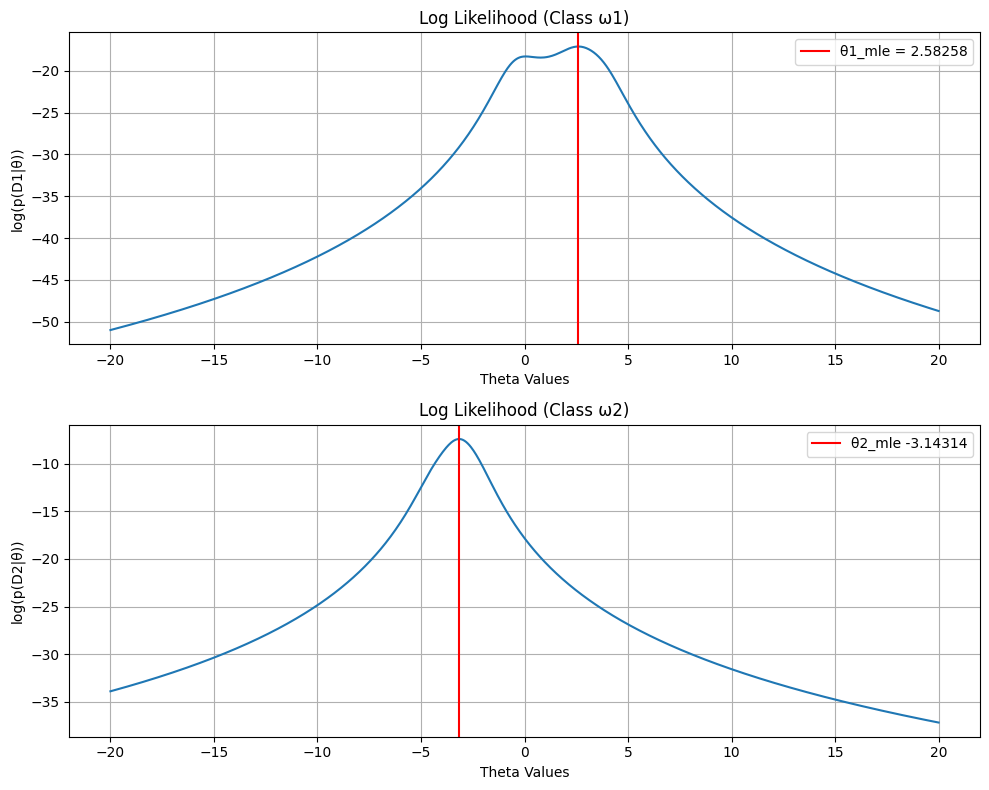

In [8]:
theta = np.linspace(-20, 20, 1000)
model_1 = Classifier()
P_w1 = len(D1) / len(D) # prior probability of class ω1
P_w2 = len(D2) / len(D) # prior probability of class ω2
theta_hat1, theta_hat2 = model_1.fit(D, theta, len(D1)) # find the θ_mle for both classes

## **Ερώτημα 2**

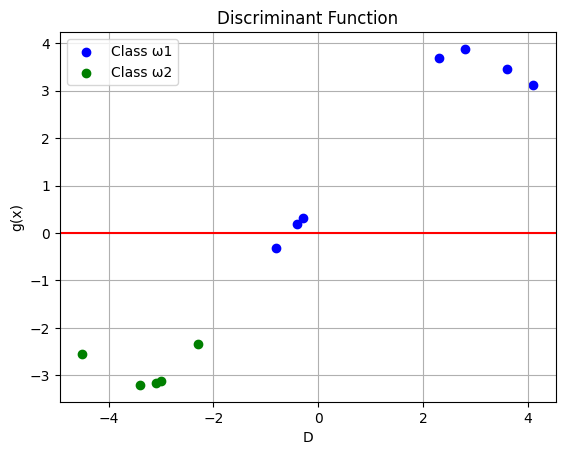

In [9]:
g = model_1.predict(D, P_w1, P_w2) # calculate the discriminant function
plt.scatter(D1,g[:len(D1)],label="Class ω1", color='blue') # plot the discriminant function for class ω1
plt.scatter(D2,g[len(D1):],label="Class ω2", color='green') # plot the discriminant function for class ω2
plt.title("Discriminant Function")
plt.xlabel("D")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.axhline(0, color='red')
plt.show()

# **Μέρος Β**

In [6]:
class BayesianClassifier():

    def __init__(self):
        pass

    # create a function to calculate the integral of a function using the trapezoidal rule
    def integral(self, f:np.array, x:np.array, step:int)->float:
        limit = step
        x_index_a = [0] # first index of x
        x_index_b = [step] 
        while limit < len(x) - step:

            x_index_a.append(limit)
            limit += step
            x_index_b.append(limit)

        x_index_a = np.array(x_index_a)
        x_index_b = np.array(x_index_b)
        
        fa = f[x_index_a] # get the values of f at the indices in x_index_a
        fb = f[x_index_b] # get the values of f at the indices in x_index_b
        a = x[x_index_a]
        b = x[x_index_b]

        z = (b - a).reshape(-1, 1)
        f_sum = (fa + fb)
        
        integral = (np.dot(f_sum, z)* 0.5)[0] # calculate the integral using the trapezoidal rule

        return integral

    
    #create function to plot the likelihoods for both classes
    def plot_likelihoods(self, theta:np.array, p_theta_D1:np.array, p_theta_D2:np.array, theta_hat1:float, theta_hat2:float):

        plt.figure(figsize=(10, 8))
        ax1 = plt.subplot(211)
        ax2 = plt.subplot(212)
        ax1.plot(theta, p_theta_D1)
        ax2.plot(theta, p_theta_D2)
        ax1.set_xlabel('Theta Values')
        ax1.set_ylabel('p(θ|D1)')
        ax1.set_title('Class ω1')
        ax1.axvline(theta_hat1,color="red",label=f"θ1_max = {theta_hat1:.5f}") # add a vertical line at θ_mle for class ω1
        ax1.grid(True)
        ax1.legend()
        ax2.set_xlabel('Theta Values')
        ax2.set_ylabel('p(θ|D2)')
        ax2.set_title('Class ω2')
        ax2.axvline(theta_hat2,color="red",label=f"θ2_max = {theta_hat2:.5f}") # add a vertical line at θ_mle for class ω2
        ax2.grid(True)
        ax2.legend()
        plt.tight_layout() # adjust the subplots to fit into the figure area.
        plt.show()

    # create a function to calculate the likelihood of the data given the theta values
    def likelihood_thetas(self, theta:np.array, D:np.array)->list:

        likelihood = np.zeros((len(theta), len(D)))
        p_D_theta = []

        for i, value in enumerate(theta):
            for j, d in enumerate(D):
                likelihood[i, j] = (1/np.pi) * (1/(1 + (d - value)**2)) # create a matrix with columns that represent the theta values and rows that represent the data points

            p_D_theta.append(np.prod(likelihood[i])) # get the product of the likelihoods for each theta value to get the likelihood of the data given the theta value

        return p_D_theta #return a list with size equal to the number of theta values that represents the likelihood of the data given the theta values

    # create a function to calculate the posterior probability of the theta values given the data
    def fit(self, D:np.array, theta:np.array, D1_length:int):
        D1 = D[:D1_length]
        D2 = D[D1_length:]

        
        p_D_theta_1 = np.array(self.likelihood_thetas(theta, D1)) # calculate the likelihood of the data given the theta values for class ω1
        p_D_theta_2 = np.array(self.likelihood_thetas(theta, D2)) # and now for class ω2
        
        
        p_theta = (1/(10*np.pi) * (1/(1+(theta/10)**2))) # calculate the prior probability of the theta values

        p_join_1 = p_D_theta_1 * p_theta # calculate the joint probability of the data 
        p_join_2 = p_D_theta_2 * p_theta 
        integral_D1 = self.integral(p_join_1, theta, 2) # calculate the integral of the joint probability 
        integral_D2 = self.integral(p_join_2, theta, 2) 

        p_posterior_1 = p_join_1 / integral_D1 # calculate the posterior 
        p_posterior_2 = p_join_2 / integral_D2

        theta_hat1 = theta[np.argmax(p_posterior_1)] # find the theta value that maximizes the posterior probability 
        theta_hat2 = theta[np.argmax(p_posterior_2)]

        self.plot_likelihoods(theta, p_posterior_1, p_posterior_2, theta_hat1, theta_hat2) 

        return p_posterior_1, p_posterior_2 

    # create a function to calculate the discriminant function
    def predict(self, D:np.array, p_posterior_1:np.array, p_posterior_2:np.array, P_w1:float, P_w2:float, theta:np.array):

        integral_values_1 = []
        integral_values_2 = []

        #in this loop we calculate integrals for each element in D (12 integrals)  
        for element in D:
            p_x_theta = (1/np.pi) * (1/ (1 + (element - theta)**2))
            
            integral_values_1.append(self.integral(p_x_theta*p_posterior_1, theta, 2)) # calculate the integral of the product of the likelihood and the posterior
            integral_values_2.append(self.integral(p_x_theta*p_posterior_2, theta, 2))

        integral_values_1 = np.array(integral_values_1) # convert the list to a numpy array
        integral_values_2 = np.array(integral_values_2)

        logP_1 = np.log(integral_values_1) # calculate the log of the integral values
        logP_2 = np.log(integral_values_2)

        h = logP_1 - logP_2 + np.log(P_w1) - np.log(P_w2) # calculate the discriminant function

        return h     

## **Ερώτημα 1**

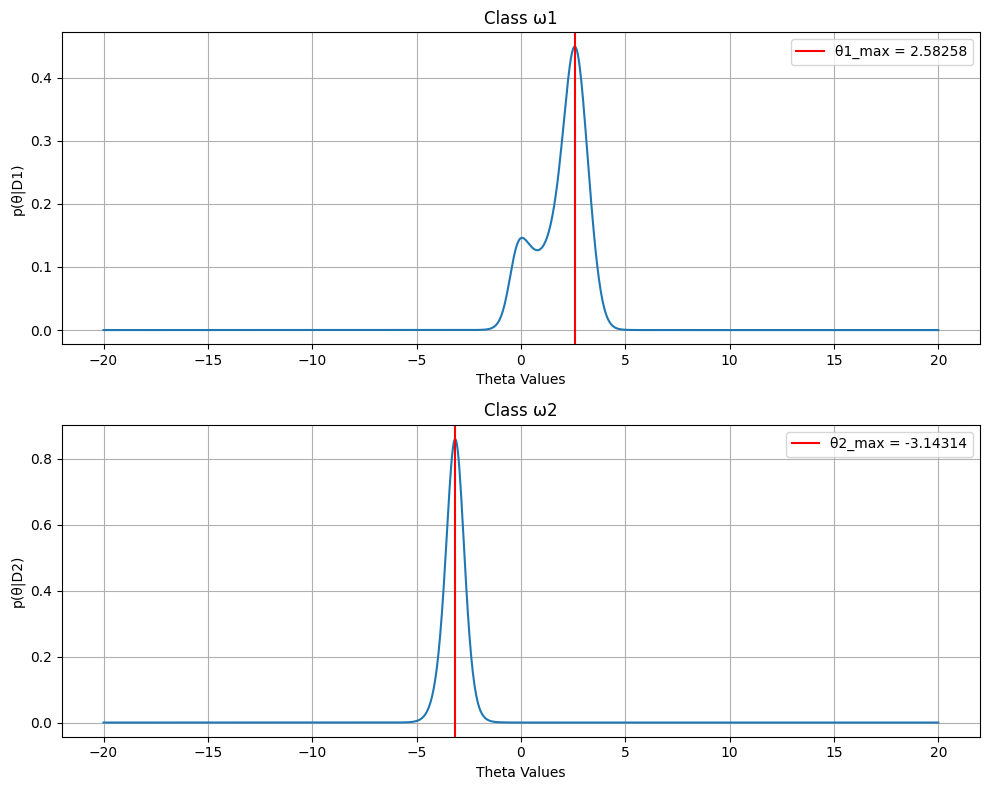

In [11]:
theta = np.linspace(-20, 20, 1000)
model_2 = BayesianClassifier()
P_w1 = len(D1) / len(D)
P_w2 = len(D2) / len(D)
posterior_1, posterior_2 = model_2.fit(D, theta, len(D1))

## **Ερώτημα 2**

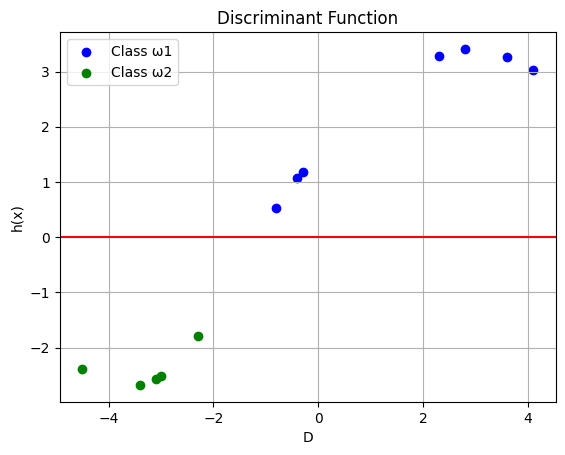

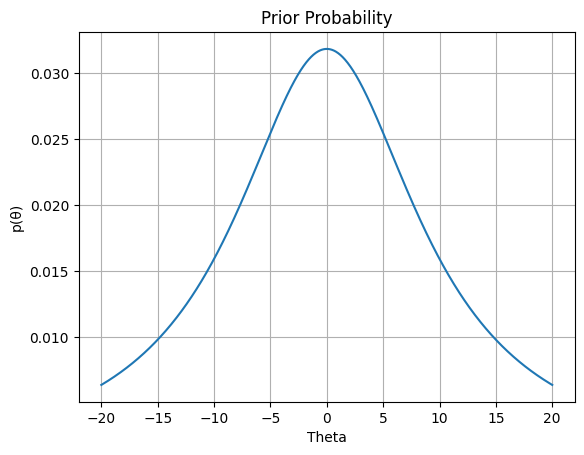

In [10]:
h = model_2.predict(D, posterior_1, posterior_2, P_w1, P_w2, theta)

plt.scatter(D1, h[:len(D1)], label="Class ω1", color='blue') # plot the discriminant function for class ω1
plt.scatter(D2, h[len(D1):], label="Class ω2", color='green') # plot the discriminant function for class ω2
plt.legend()
plt.grid(True)
plt.title("Discriminant Function")
plt.xlabel("D")
plt.ylabel("h(x)")
plt.axhline(0, color='red')
plt.show()

# plot the prior probability
p_theta = (1/(10*np.pi) * (1/(1+(theta/10)**2))) # calculate the prior probability of the theta values
plt.plot(theta, p_theta) # plot the prior probability
plt.grid(True)
plt.title("Prior Probability")
plt.xlabel("Theta")
plt.ylabel("p(θ)")
plt.show()

# **Μέρος Γ**

In [15]:
from  sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris(as_frame=True)
X,y = iris.data, iris.target
class_names = iris.target_names # get the class names
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]

In [14]:
def evaluate_model(y_test, y_preds):
    report = {}

    report["accuracy"] = accuracy_score(y_test, y_preds) 
    report["balanced_accuracy"] = balanced_accuracy_score(y_test, y_preds)
    report["confusion_matrix"] = confusion_matrix(y_test, y_preds)
    report["classification"] = classification_report(y_test, y_preds, target_names=class_names)

    print(f'Accuracy: {report["accuracy"]*100:.4f}% | Balanced Accuracy: {report["balanced_accuracy"]*100:.4f}%')
    return report

## **Ενότητα 1 Ερώτημα 1**

Accuracy: 70.6667% | Balanced Accuracy: 68.4158%


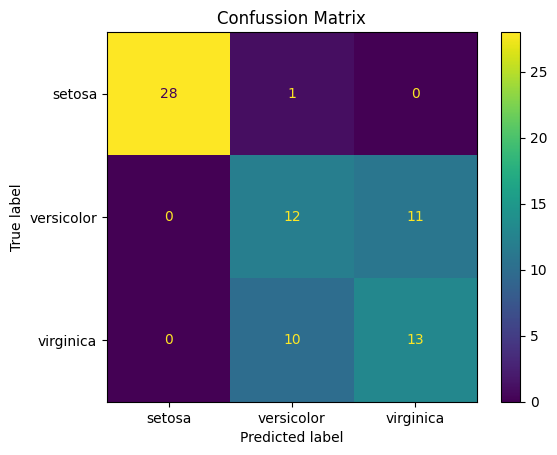

In [16]:
d_tree_v1 = DecisionTreeClassifier(random_state=42) # create a decision tree classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) # split the data into training and testing sets
d_tree_v1.fit(X_train, y_train) # fit the model on the training data
y_preds = d_tree_v1.predict(X_test)
report = evaluate_model( y_test, y_preds)

conf_matrix = report["confusion_matrix"]
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names) # create a confusion matrix display
disp.plot()
plt.title("Confussion Matrix")
plt.show()

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'max_depth': 3}
Accuracy: 78.6667% | Balanced Accuracy: 77.1114%


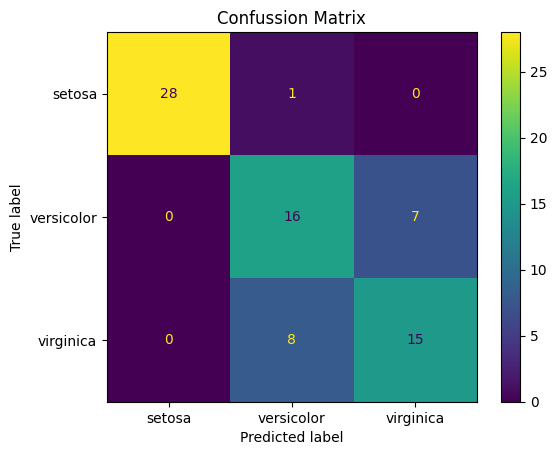

In [18]:
param_grid = {
    "max_depth" : [1, 2, 3, 4, 5, 10, 15, 20, 25]
}

d_tree_v2 = DecisionTreeClassifier(random_state=42) # create a new decision tree classifier

grid_search = GridSearchCV(d_tree_v2, param_grid, scoring="balanced_accuracy", cv=10, verbose=1) # create a grid search object
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_tree = grid_search.best_estimator_

print(best_params)

y_preds = best_tree.predict(X_test) # make predictions using the best tree

result = evaluate_model(y_test, y_preds)
conf_matrix = result["confusion_matrix"]
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names) # create a confusion matrix display object
disp.plot()
plt.title("Confussion Matrix")
plt.show()

## **Ενότητα 1 Ερώτημα 2**

c:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\chris\AppData\Local\Temp\ipykernel_22692\1698447873.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = plt.scatter(


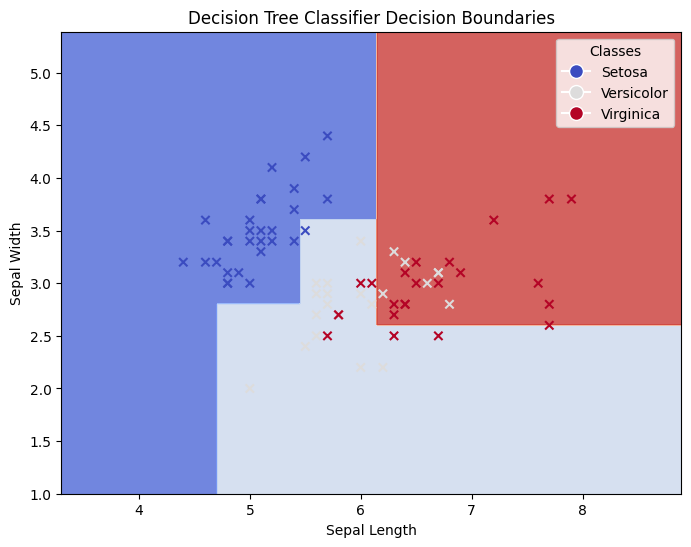

In [20]:
X_np = X.to_numpy()
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01)) # create a meshgrid for the data points

Z = best_tree.predict(np.c_[xx.ravel(), yy.ravel()]) # predict the class for each data point in the meshgrid
Z = Z.reshape(xx.shape) # reshape the predictions to match the meshgrid shape

class_names = ['Setosa', 'Versicolor', 'Virginica']

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # Decision boundaries

# Scatter plot for test data points
scatter = plt.scatter(
    X_test_np[:, 0], X_test_np[:, 1],
    c=y_test,
    edgecolor='k',
    cmap=plt.cm.coolwarm,
    marker='x',
    label='Test Data'
)

# Scatter plot for training data points
colors = [plt.cm.coolwarm(i / (len(class_names) - 1)) for i in range(len(class_names))]

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name) 
           for color, name in zip(colors, class_names)] # create a legend with the class names and colors

plt.legend(handles=handles, title="Classes")
plt.title("Decision Tree Classifier Decision Boundaries")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


## **Ενότητα 2 Ερώτημα 1** 

Accuracy: 80.0000% | Balanced Accuracy: 78.2609%


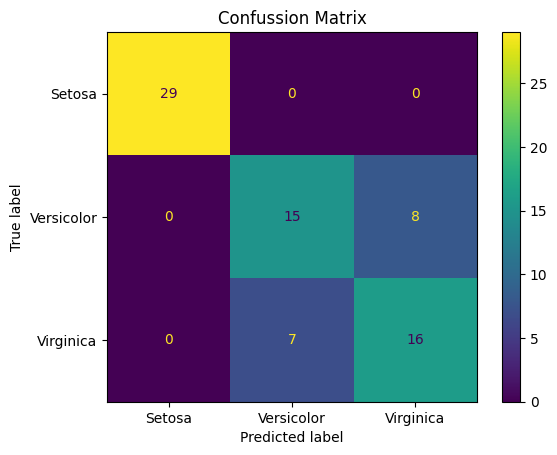

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,bootstrap=True, random_state=42,max_depth=5, max_samples=0.5, max_features=None) # create a random forest classifier   

rf.fit(X_train, y_train) # fit the model to the training data    

y_pred = rf.predict(X_test) # make predictions on the test data

result = evaluate_model(y_test, y_pred)
conf_matrix = result["confusion_matrix"]
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names) # create a confusion matrix display object
disp.plot()
plt.title("Confussion Matrix")
plt.show()

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'max_depth': 3}
Accuracy: 80.0000% | Balanced Accuracy: 78.2609%


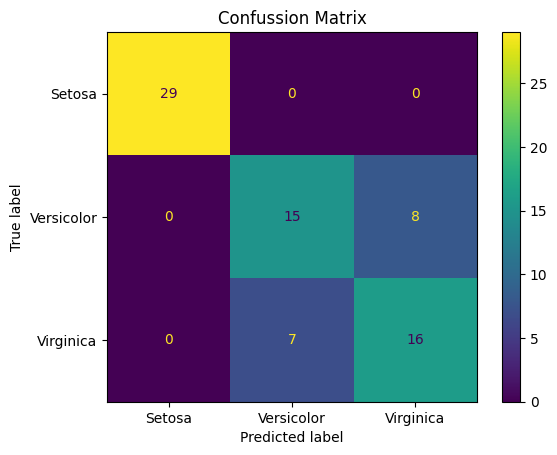

In [23]:
# d_tree_v4 = DecisionTreeClassifier(random_state=42)
# bag_clf_2 = BaggingClassifier(estimator=d_tree_v4, n_estimators=100, max_samples=0.5)

rf_v2 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42, max_samples=0.5, max_features=None) # create a random forest classifier
param_grid = {
    "max_depth" : [1, 2, 3, 4, 5, 7, 10, 15, 20]
} # create a parameter grid for the grid search

grid_search_2 = GridSearchCV(rf_v2, param_grid=param_grid, cv=10, scoring="balanced_accuracy", verbose=1) # create a grid search object

grid_search_2.fit(X_train, y_train)

forest_params = grid_search_2.best_params_
print(forest_params)
best_forest = grid_search_2.best_estimator_
y_preds = best_forest.predict(X_test)

# evaluate the model
result = evaluate_model(y_test, y_preds)
conf_matrix = result["confusion_matrix"]
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names) # create a confusion matrix display object
disp.plot()
plt.title("Confussion Matrix")
plt.show()

# **Ενότητα 2 Ερώτηση 2**

c:\Users\chris\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\chris\AppData\Local\Temp\ipykernel_22692\1714715688.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


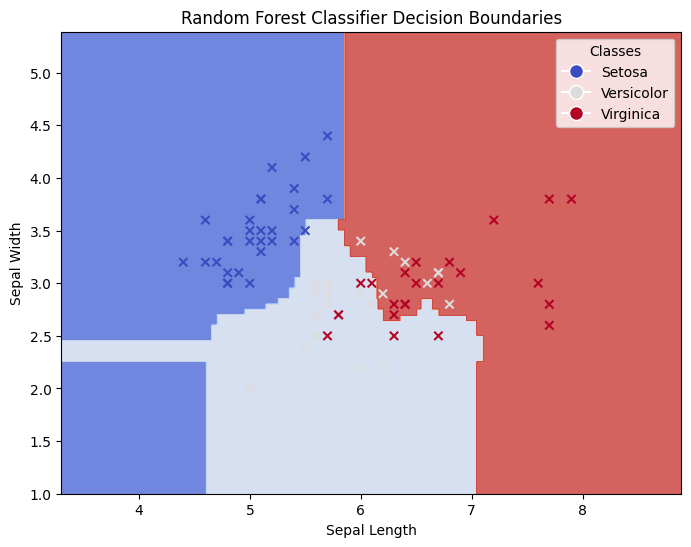

In [24]:
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01)) # create a meshgrid for the decision boundaries

Z = best_forest.predict(np.c_[xx.ravel(), yy.ravel()]) # make predictions on the meshgrid
Z = Z.reshape(xx.shape) # reshape the predictions to the shape of the meshgrid

class_names = ['Setosa', 'Versicolor', 'Virginica']

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # Decision boundaries

plt.scatter(
    X_test_np[:, 0], X_test_np[:, 1],  
    c=y_test,  # Labels for test samples
    edgecolor='k',
    cmap=plt.cm.coolwarm,
    marker='x'
)

# Create a legend for the classes
colors = [plt.cm.coolwarm(i / (len(class_names) - 1)) for i in range(len(class_names))]

# Create a legend for the classes
handles_classes = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name) 
                   for color, name in zip(colors, class_names)]

plt.legend(handles=handles_classes, title="Classes")
plt.title("Random Forest Classifier Decision Boundaries")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


## **Ενότητα 2 Ερώτημα 3**

Accuracy: 84.0000% | Balanced Accuracy: 82.6087%
Accuracy: 84.0000% | Balanced Accuracy: 82.6087%
Accuracy: 82.6667% | Balanced Accuracy: 81.1594%
Accuracy: 78.6667% | Balanced Accuracy: 76.8116%
Accuracy: 78.6667% | Balanced Accuracy: 76.8116%
Accuracy: 81.3333% | Balanced Accuracy: 79.7101%
Accuracy: 81.3333% | Balanced Accuracy: 79.7101%
Accuracy: 81.3333% | Balanced Accuracy: 79.7101%
Accuracy: 82.6667% | Balanced Accuracy: 81.1594%
Accuracy: 84.0000% | Balanced Accuracy: 82.6087%
Accuracy: 84.0000% | Balanced Accuracy: 82.6087%
Accuracy: 81.3333% | Balanced Accuracy: 79.7101%
Accuracy: 81.3333% | Balanced Accuracy: 79.7101%
Accuracy: 81.3333% | Balanced Accuracy: 79.7101%
Accuracy: 80.0000% | Balanced Accuracy: 78.2609%
Accuracy: 81.3333% | Balanced Accuracy: 79.7101%
Accuracy: 81.3333% | Balanced Accuracy: 79.7101%
Accuracy: 80.0000% | Balanced Accuracy: 78.2609%
Accuracy: 78.6667% | Balanced Accuracy: 76.8116%
Accuracy: 78.6667% | Balanced Accuracy: 76.8116%
Accuracy: 80.0000% |

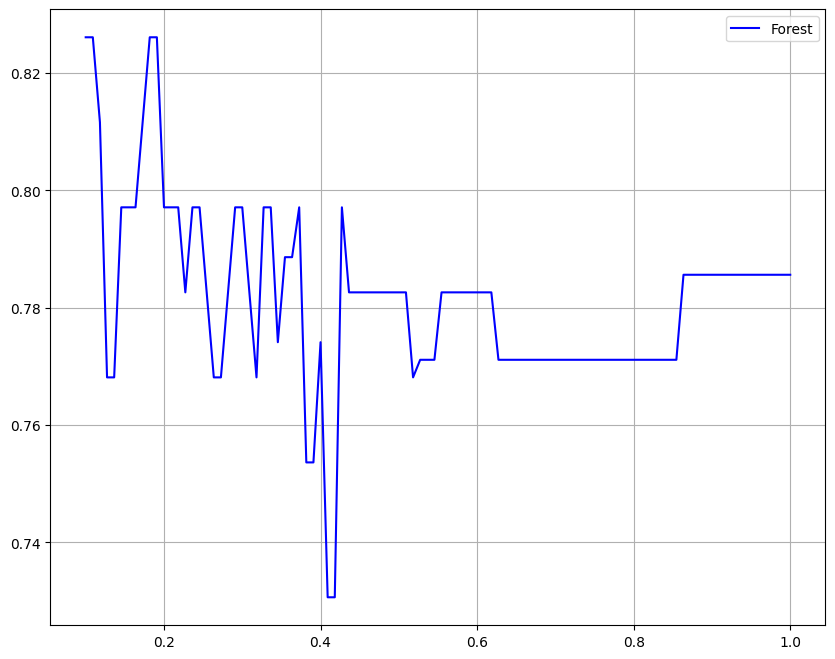

In [27]:
max_samples = np.linspace(0.1, 1, 100)
result_f = []

# loop through the max_samples values
for sample in max_samples:
    rf_v3 = RandomForestClassifier(n_estimators=100, criterion="gini", bootstrap=True, random_state=42, max_samples=sample, max_features=None, max_depth=3)
    rf_v3.fit(X_train, y_train)
    y_preds_f = rf_v3.predict(X_test)
    result_f.append(evaluate_model(y_test, y_preds_f))

# get the balanced accuracy values
bal_acc_f = []

# loop through the results and get the balanced accuracy values
for i in range(0, 100):
    bal_acc_f.append(result_f[i]["balanced_accuracy"])

plt.figure(figsize=(10, 8))
plt.plot(max_samples, bal_acc_f, color="blue", label="Forest")
plt.legend()
plt.grid(True)
plt.show()